## 3b) Usando la representación (2), genere un código que pueda generar funciones que satisfacen que:
### 1) sean periódicas y pares en $L^2([−1,1])$.
### 2) sean estríctamente crecientes en $L^2([0,1])$.
### 3) sean positivas e integren 1 en $L^2([0,1])$.

$$f(t) := f\left(t, \{\kappa_i\}_{i=0}^\infty\right) = \sum_{i=0}^\infty \kappa_i\varphi_i(t) \qquad\qquad (2)$$

donde $\{\varphi_i\}_{i=0}^\infty$ es una base ortogonal de $L^2(\Omega)$ y $\{\kappa_i\}_{i=0}^\infty$ una secuencia de números reales.

Importamos las librerías/funciones necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Definimos las funciones de la pregunta 3a)

In [2]:
def simular_seq_S_k(k, alpha, theta):
    return np.array([beta(1-alpha, theta+alpha*i).rvs(1) for i in range(1, k+1)])

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1, k+1)])

Definimos funciones auxiliares:

In [15]:
def gen_f(phi, k, alpha, theta):
    '''
    Genera una función 'f' como la serie cortada al término 'k'-esimo,
    con la familia de funciones 'phi' y los pesos W_k(alpha, theta)
    '''
    pesos = simular_seq_W_k(k, alpha, theta)
    return lambda x: sum([peso_k * phi(i)(x) for i, peso_k in zip(range(k), pesos)])

## 3b) 1) Sean periódicas y pares en $L^2([−1,1])$.

In [28]:
cos = lambda k: np.vectorize(lambda x: np.cos(np.pi * k * x))

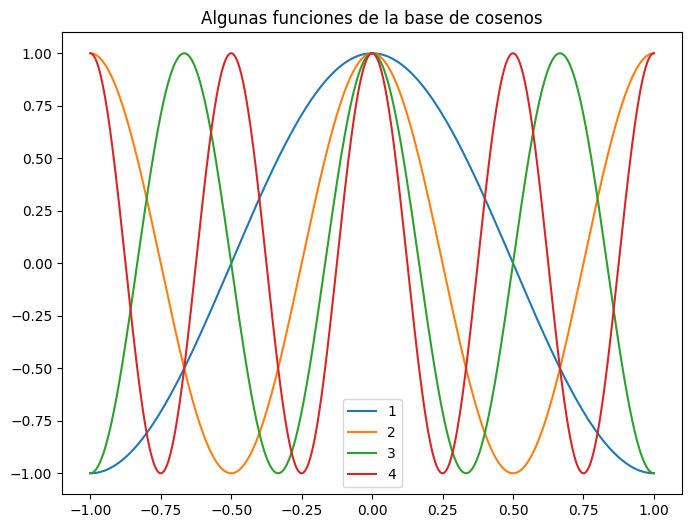

In [17]:
x = np.linspace(-1,1,1_000)

plt.figure(figsize=(8,6))
for k in range(1,5):
    plt.plot(x, cos(k)(x), label=f'{k}')
plt.legend()
plt.title('Algunas funciones de la base de cosenos');

Generemos un ejemplo de la función $f$ cortada con ciertos parámetros que generan la secuencia $W_k$.

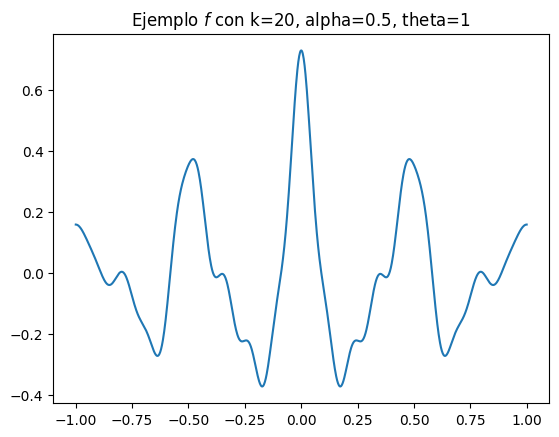

In [25]:
k, alpha, theta = 20, 0.5, 1

f = gen_f(cos, k, alpha, theta)

x = np.linspace(-1,1,1_000)
plt.plot(x, f(x))
plt.title(f'Ejemplo $f$ con {k=}, {alpha=}, {theta=}');

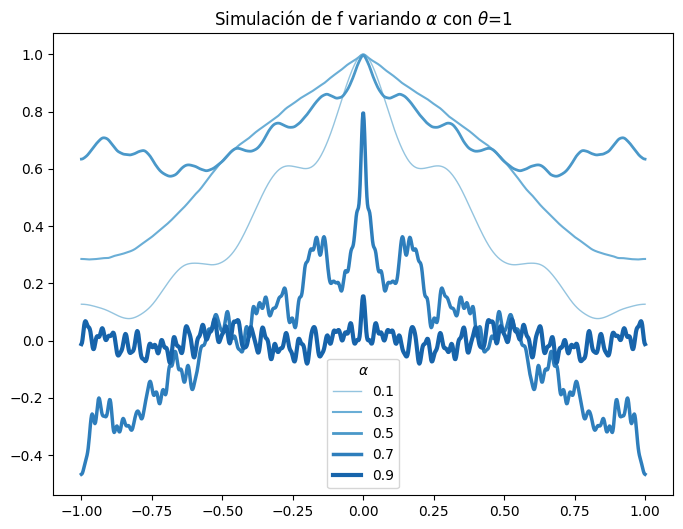

In [26]:
k, theta = 100, 1
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

x = np.linspace(-1,1,1_000)

plt.figure(figsize=(8,6))
for i,alpha in enumerate(alphas):
    f = gen_f(cos, k, alpha, theta)
    plt.plot(x, f(x), label=f'{alpha}', lw=i/2+1, c=plt.cm.Blues((i+4)/(2*len(alphas))))
plt.title(f'Simulación de f variando $\\alpha$ con $\\theta$={theta}')
plt.legend(title=r'$\alpha$');

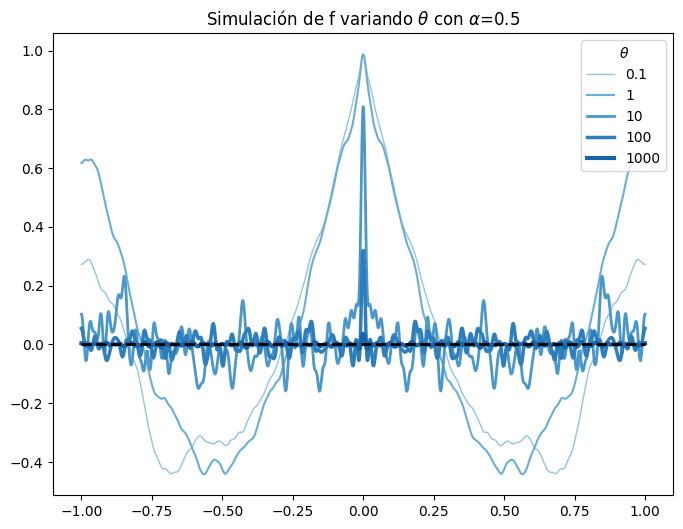

In [27]:
k, alpha = 100, 0.5
thetas = [0.1, 1, 10, 100, 1000]

x = np.linspace(-1,1,1_000)
plt.figure(figsize=(8,6))
for i,theta in enumerate(thetas):
    f = gen_f(cos, k, alpha, theta)
    plt.plot(x, f(x), label=f'{theta}', lw=i/2+1, c=plt.cm.Blues((i+4)/(2*len(thetas))))

plt.plot([-1,1], [0,0], ls='--', lw=2, c='k')
plt.title(f'Simulación de f variando $\\theta$ con $\\alpha$={alpha}')
plt.legend(loc='upper right', title=r'$\theta$');

## 3b) 2) Sean estríctamente crecientes en $L^2([0,1])$.

In [ ]:
from scipy.special import legendre

In [ ]:
sin = lambda k: np.vectorize(lambda x: np.sin(np.pi * k * x))

In [ ]:
k, theta = 10, 10
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

x = np.linspace(0,1,1_000)

plt.figure(figsize=(8,6))
for alpha in alphas:
    f = gen_f(sin, k, alpha, theta)
    plt.plot(x, f(x), label=f'{alpha}')
plt.legend();

In [ ]:
k, theta = 10, 10
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

x = np.linspace(-1,1,10_000)

plt.figure(figsize=(8,6))
for alpha in alphas:
    f = gen_f(legendre, k, alpha, theta)
    plt.plot(x, f(2*x-1), label=f'{alpha}')
plt.legend();

In [ ]:
x = np.linspace(0,1,1_000)
plt.figure(figsize=(8,6))

for k in range(1,10):
    plt.plot(x, np.sqrt(k+1/2)*legendre(k)(2*x-1), label=f'{k}')
plt.legend();

## 3b) 3) Sean positivas e integren 1 en $L^2([0,1])$.